<a href="https://colab.research.google.com/github/spinedace/AlgorithmsUN2023II/blob/main/Lab7/spinedace_Grupo21_Gale_Shapley_and_Irving_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name:** Santiago Alfonso Pineda Ceballos# **UN Id:** spinedace# L**ist number:** 22# **Group :** 21

Gale-Shapley Algorithm

In [ ]:
#Codigo adaptado de https://www.geeksforgeeks.org/stable-marriage-problem/

from PIL import Image as PillowImage, ImageDraw, ImageFont

iteracionesTotales=[]

# Python3 program for stable marriage problem



# This function returns true if
# woman 'w' prefers man 'm1' over man 'm'
def wPrefersM1OverM(prefer, w, m, m1):

    # Check if w prefers m over her
    # current engagement m1
    for i in range(N):

        # If m1 comes before m in list of w,
        # then w prefers her current engagement,
        # don't do anything
        if (prefer[w][i] == m1):
            return True

        # If m comes before m1 in w's list,
        # then free her current engagement
        # and engage her with m
        if (prefer[w][i] == m):
            return False

# Prints stable matching for N boys and N girls.
# Boys are numbered as 0 to N-1.
# Girls are numbered as N to 2N-1.
def stableMarriage(prefer, imprimir, gif):

    numIteraciones = 0


    # Stores partner of women. This is our output
    # array that stores passing information.
    # The value of wPartner[i] indicates the partner
    # assigned to woman N+i. Note that the woman numbers
    # between N and 2*N-1. The value -1 indicates
    # that (N+i)'th woman is free
    wPartner = [-1 for i in range(N)]

    # An array to store availability of men.
    # If mFree[i] is false, then man 'i' is free,
    # otherwise engaged.
    mFree = [False for i in range(N)]

    freeCount = N

    # While there are free men
    while (freeCount > 0):

        numIteraciones+=1

        # Pick the first free man (we could pick any)
        m = 0
        while (m < N):
            if (mFree[m] == False):
                break
            m += 1

        # One by one go to all women according to
        # m's preferences. Here m is the picked free man
        i = 0
        while i < N and mFree[m] == False:
            w = prefer[m][i]

            # The woman of preference is free,
            # w and m become partners (Note that
            # the partnership maybe changed later).
            # So we can say they are engaged not married
            if (wPartner[w - N] == -1):
                wPartner[w - N] = m
                mFree[m] = True
                freeCount -= 1

            else:

                # If w is not free
                # Find current engagement of w
                m1 = wPartner[w - N]

                # If w prefers m over her current engagement m1,
                # then break the engagement between w and m1 and
                # engage m with w.
                if (wPrefersM1OverM(prefer, w, m, m1) == False):
                    wPartner[w - N] = m
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
        if gif:
          matriz_cuadricula = [[0] * N for _ in range(N)]
          crear_imagen(matriz_cuadricula, wPartner, mFree,numIteraciones)





            # End of Else
        # End of the for loop that goes
        # to all women in m's list
    # End of main while loop

    iteracionesTotales.append(numIteraciones)

    # Print solution
    if imprimir:
      print("Woman ", " Man")
      for i in range(N):
          print(i + N, "\t", wPartner[i])

      print("Numero de iteraciones: ", numIteraciones, "\n")


    if gif:
      images = []
      for n in range(1,numIteraciones+1):
          frame = PillowImage.open(str(n)+".gif")
          images.append(frame)

      images[0].save('animacion.gif',
                save_all=True,
                append_images=images[1:],
                duration=500,
                loop=0)





# This code is contributed by Mohit Kumar


In [ ]:
import random

def peorCaso(N):
    prefer = []

    sublist = list(range(N, 2*N))
    prefer.append(list(sublist))
    sublist.pop(N-1)
    for n in range(N-1):
        sublist.extend([sublist.pop(0),2*N-1])
        prefer.append(list(sublist))
        sublist.pop(N-1)


    sublist = list(range(N))
    for n in range(N,2*N):
        sublist.append(sublist.pop(0))
        prefer.append(list(sublist))


    return prefer

def mejorCaso(N):
    prefer = []

    sublist = list(range(N, 2*N))
    prefer.append(list(sublist))
    for n in range(N,2*N-1):
        sublist.append(sublist.pop(0))
        prefer.append(list(sublist))


    sublist = list(range(N))
    prefer.append(list(sublist))
    for n in range(N-1):
        sublist.append(sublist.pop(0))
        prefer.append(list(sublist))


    return prefer


def casoAleatorio(N):
    prefer = []

    sublist = list(range(N, 2*N))
    for n in range(N,2*N):
        random.shuffle(sublist)
        prefer.append(list(sublist))

    sublist = list(range(N))
    for n in range(N):
        random.shuffle(sublist)
        prefer.append(list(sublist))



    return prefer

Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

In [ ]:
N = 4
stableMarriage(mejorCaso(N), True, False)
stableMarriage(peorCaso(N), True, False)

N = 40
stableMarriage(mejorCaso(N), True, False)
stableMarriage(peorCaso(N), True, False)

Woman   Man
4 	 0
5 	 1
6 	 2
7 	 3
Numero de iteraciones:  4 

Woman   Man
4 	 1
5 	 2
6 	 3
7 	 0
Numero de iteraciones:  13 

Woman   Man
40 	 0
41 	 1
42 	 2
43 	 3
44 	 4
45 	 5
46 	 6
47 	 7
48 	 8
49 	 9
50 	 10
51 	 11
52 	 12
53 	 13
54 	 14
55 	 15
56 	 16
57 	 17
58 	 18
59 	 19
60 	 20
61 	 21
62 	 22
63 	 23
64 	 24
65 	 25
66 	 26
67 	 27
68 	 28
69 	 29
70 	 30
71 	 31
72 	 32
73 	 33
74 	 34
75 	 35
76 	 36
77 	 37
78 	 38
79 	 39
Numero de iteraciones:  40 

Woman   Man
40 	 1
41 	 2
42 	 3
43 	 4
44 	 5
45 	 6
46 	 7
47 	 8
48 	 9
49 	 10
50 	 11
51 	 12
52 	 13
53 	 14
54 	 15
55 	 16
56 	 17
57 	 18
58 	 19
59 	 20
60 	 21
61 	 22
62 	 23
63 	 24
64 	 25
65 	 26
66 	 27
67 	 28
68 	 29
69 	 30
70 	 31
71 	 32
72 	 33
73 	 34
74 	 35
75 	 36
76 	 37
77 	 38
78 	 39
79 	 0
Numero de iteraciones:  1561 



Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

Mayor: 8
Menor: 4
Media: 5.24



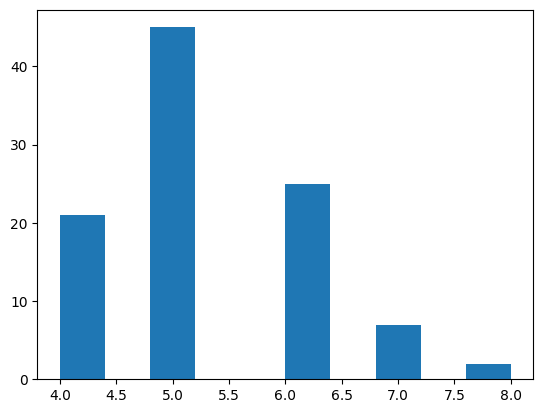

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

N=4
iteracionesTotales = []
for n in range(100):
  stableMarriage(casoAleatorio(N), False, False)

print("Mayor: {}\nMenor: {}\nMedia: {}\n".format(max(iteracionesTotales),min(iteracionesTotales),(sum(iteracionesTotales)/len(iteracionesTotales))))

plt.hist(iteracionesTotales)
plt.show()

Mayor: 118
Menor: 56
Media: 79.85



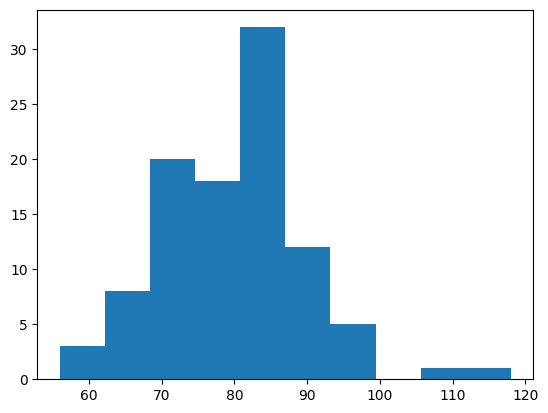

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

N=40
iteracionesTotales = []
for n in range(100):
  stableMarriage(casoAleatorio(N), False, False)

print("Mayor: {}\nMenor: {}\nMedia: {}\n".format(max(iteracionesTotales),min(iteracionesTotales),(sum(iteracionesTotales)/len(iteracionesTotales))))

plt.hist(iteracionesTotales)
plt.show()

In [ ]:
from PIL import Image as PillowImage, ImageDraw, ImageFont




def crear_imagen(matriz, wPartner, mFree,name,):
    tamano_imagen = (30 * len(matriz[0]), 30 * len(matriz)+ 20)
    imagen = PillowImage.new("RGB", tamano_imagen, "white")
    draw = ImageDraw.Draw(imagen)

    matriz = [[0] * N for _ in range(N)]
    for i in range(N):
      if wPartner[i]!=-1:
          matriz[i][wPartner[i]-N] = 1

      if mFree[i]==False:
        for j in range(N):
          matriz[j][i] = 2



    # Dibujar cuadrícula y cuadrados negros y rojos
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            if matriz[i][j] == 1:
                x = j * 30
                y = i * 30 + 20
                draw.rectangle([(x, y), (x + 30, y + 30)], fill="black")
            if matriz[i][j] == 2:
                x = j * 30
                y = i * 30 + 20
                draw.rectangle([(x, y), (x + 30, y + 30)], fill="red")

    for i in range(len(matriz[0]) + 1):
        x = i * 30
        y = i * 30 + 20
        draw.line([(x, 20), (x, tamano_imagen[1])], fill="black", width=2)
        draw.line([(0, y), (tamano_imagen[0], y)], fill="black", width=2)



    fuente = ImageFont.load_default()
    draw.text((5, 0), "# iteraciones = " + str(name), font=fuente, fill="black")


    imagen.save(str(name) + ".gif")
    imagen.show()




Woman   Man
4 	 0
5 	 3
6 	 1
7 	 2
Numero de iteraciones:  4 



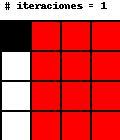

In [ ]:
from IPython.display import Image as ColabImage, display

N=4

stableMarriage(casoAleatorio(N),True, True)

imagen_gif = ColabImage(filename="animacion.gif")
display(imagen_gif)

Woman   Man
40 	 0
41 	 22
42 	 7
43 	 25
44 	 32
45 	 30
46 	 21
47 	 1
48 	 5
49 	 10
50 	 38
51 	 36
52 	 8
53 	 23
54 	 31
55 	 29
56 	 35
57 	 26
58 	 14
59 	 18
60 	 11
61 	 15
62 	 12
63 	 13
64 	 6
65 	 20
66 	 39
67 	 9
68 	 37
69 	 2
70 	 27
71 	 28
72 	 16
73 	 4
74 	 24
75 	 34
76 	 3
77 	 17
78 	 33
79 	 19
Numero de iteraciones:  72 



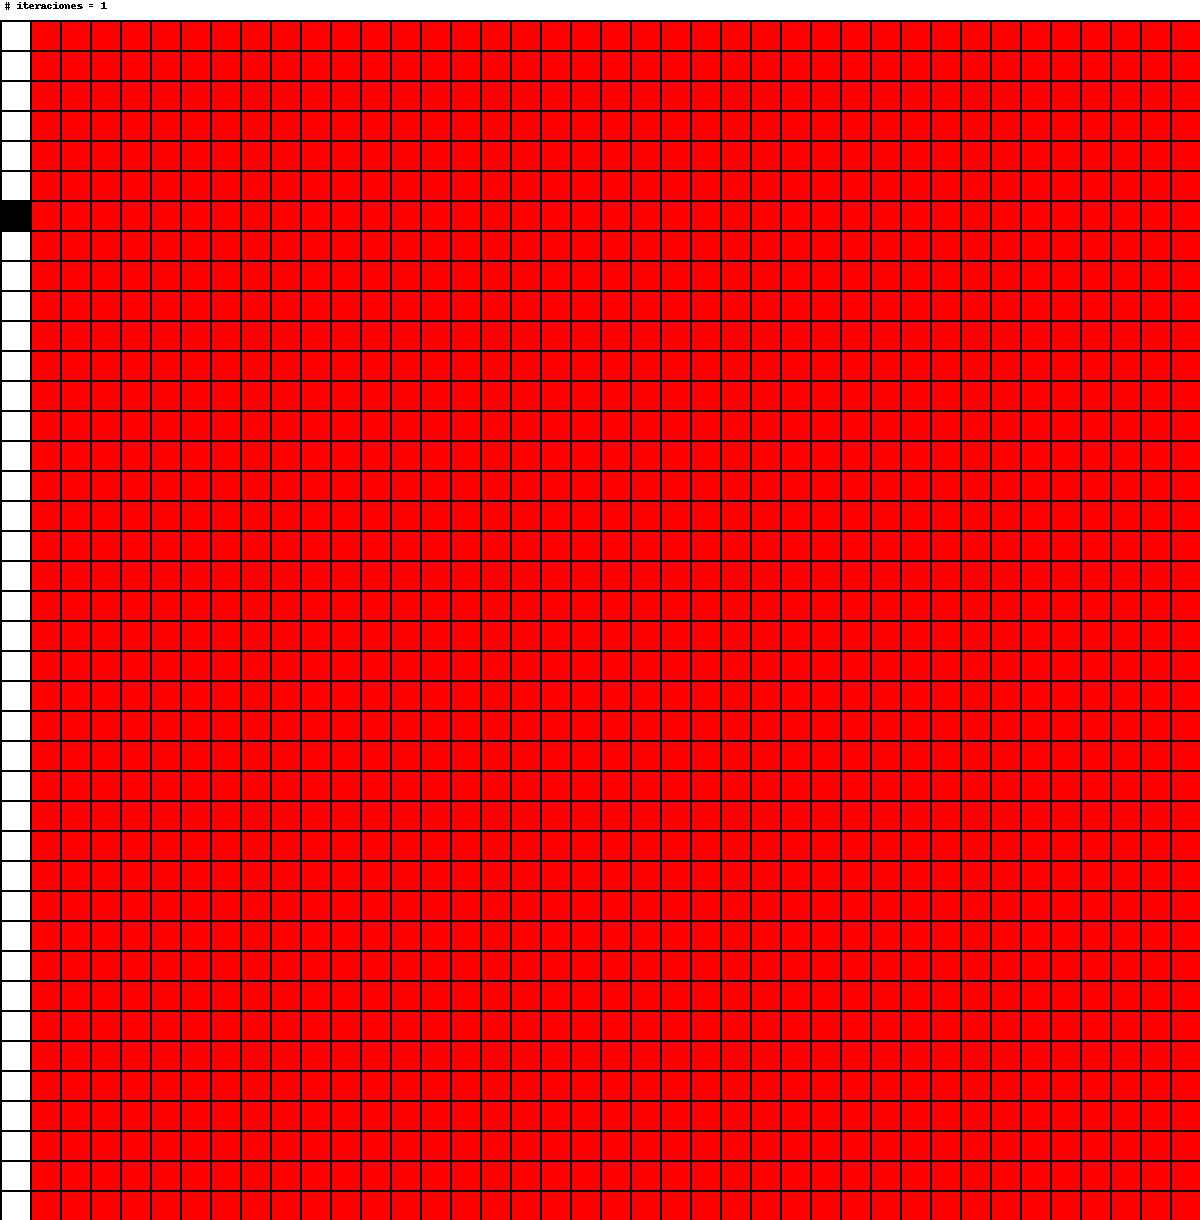

In [ ]:
from IPython.display import display, Image

N=40

stableMarriage(casoAleatorio(N),True, True)

imagen_gif = Image(filename="animacion.gif")
display(imagen_gif)

Simulate the the Gale-Shapley and Irving algorithms using random preference lists , for n=4 and 40 and generate a gift animation fo the type show in “Illustrating the Deferred Acceptance Algorithm with

['0', '1', '2', '3', '4', '5']
[['0', '2', '4', '5', '3', '1'], ['1', '3', '0', '4', '5', '2'], ['2', '3', '4', '5', '0', '1'], ['3', '0', '5', '4', '1', '2'], ['4', '3', '5', '1', '0', '2'], ['5', '1', '0', '3', '4', '2']]
2 has no previous requests 
3 has no previous requests 
3 has request from 1
	3 prefers 1 to 2
4 has no previous requests 
0 has no previous requests 
3 has request from 1
	3 prefers 4 to 1
0 has request from 3
	0 prefers 3 to 1
4 has request from 2
	4 prefers 1 to 2
5 has no previous requests 
1 has no previous requests 


Reduced lists:
0  :  ['2', '5', '3']
1  :  ['4', '5']
2  :  ['5', '0']
3  :  ['0', '5', '4']
4  :  ['3', '5', '1']
5  :  ['1', '0', '3', '4', '2']


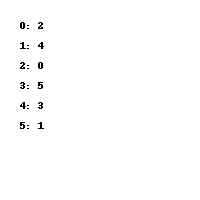


Stable Roommates:
0  ---  2
1  ---  5
2  ---  0
3  ---  4
4  ---  3
5  ---  1


In [524]:
#Codigo adaptado de https://github.com/crazypegasusvv/GameTheory/blob/master/stable_roommates/stable_roommates.py

from PIL import Image as PillowImage, ImageDraw, ImageFont
import random

# stable roommate problem
N=6
tenants=[]

for n in range(N):
    tenants.append(str(n))


preferences_list = []
for n in range(N):
  lista_temp = random.sample(tenants,N)
  lista_temp.remove(str(n))
  lista_temp.insert(0,str(n))
  preferences_list.append(lista_temp)

print(tenants)
print(preferences_list)


class Person(object):
    def __init__(self, name):
        self.name = name
        self.preferences = None
        self.requester = None
        self.proposal = None

    def get_name(self):
        return self.name

    def get_preferences(self):
        return self.preferences

    def get_next_preference(self):
        if len(self.preferences) == 0:
            return None
        return self.preferences[0]

    def compare(self, first, second):
        return self.preferences.index(first) < self.preferences.index(second)

    def add_preferences(self, preferences):
        self.preferences = preferences

    def remove_preference(self, name):
        if name in self.preferences:
            self.preferences.remove(name)

    def get_requester(self):
        return self.requester

    def add_request(self, requester):
        self.requester = requester

    def get_proposal(self):
        return self.proposal

    def propose_to(self, person):
        self.proposal = person


def justify_req(people, person, requester):
    if people[person].get_requester() is None:
        print(person + ' has no previous requests ')
        people[requester].propose_to(person)
        people[person].add_request(requester)
    else:
        prev_requester = people[person].get_requester()
        print(person + ' has request from ' + prev_requester)
        if people[person].compare(requester, prev_requester):
            print('\t' + person + ' prefers ' + requester + ' to ' + prev_requester)
            people[requester].propose_to(person)
            people[person].add_request(requester)
            people[prev_requester].propose_to(None)
            people[prev_requester].remove_preference(person)
            next_pref = people[prev_requester].get_next_preference()
            if next_pref is not None:
                people = justify_req(people, next_pref, prev_requester)
        else:
            print('\t' + person + ' prefers ' + prev_requester + ' to ' + requester)
            people[requester].remove_preference(person)
            people[requester].propose_to(None)
            next_pref = people[requester].get_next_preference()
            if next_pref is not None:
                people = justify_req(people, next_pref, requester)





    return people


def phase_one(people):
    for name in people.keys():
        first = people[name].get_next_preference()
        people = justify_req(people, first, name)
    return people


def phase_two(people):
    print('Reduced lists:')
    for ech in people:
        print(ech, ' : ', people[ech].get_preferences())
    cycle_exists = True
    match_exists = True
    n=0
    while cycle_exists:
        n+=1
        starter = None
        for mate in people.keys():
            mate_prefs = people[mate].get_preferences()
            if len(mate_prefs) > 1 and starter is None:
                starter = mate
            elif len(mate_prefs) == 0:
                match_exists = False
                break
        if starter is None:
            cycle_exists = False
        else:
            p_set = [starter]
            follower = people[starter].get_preferences()[1]
            q_set = [follower]
            next_mate = people[follower].get_preferences()[-1]
            while next_mate not in p_set:
                p_set.append(next_mate)
                q_set.append(people[next_mate].get_preferences()[1])
                next_mate = people[q_set[-1]].get_preferences()[-1]
            p_set.append(next_mate)
            for pos in range(len(q_set)):
                people[q_set[pos]].remove_preference(p_set[pos + 1])
                people[p_set[pos + 1]].remove_preference(q_set[pos])




        matches = {}
        for ech in people:
            matches[ech] = people[ech].get_preferences()[0]
            imagen = PillowImage.new('RGB', (200, 200), 'white')
            draw = ImageDraw.Draw(imagen)
            fuente = ImageFont.load_default()
            x, y = 20, 20
            for clave, valor in matches.items():
              texto = f"{clave}: {valor}"
              draw.text((x, y), texto, font=fuente, fill='black')
              y += 20  # Incrementar la posición en el eje y para el siguiente par clave-valor


        imagen.save(str(n) + ".gif")

    images = []
    for m in range(1,n):
      frame = PillowImage.open(str(m)+".gif")
      images.append(frame)

    if (len(images)>0):
      images[0].save('animacion.gif',
                save_all=True,
                append_images=images[1:],
                duration=500,
                loop=0)

    imagen_gif = Image(filename="animacion.gif")
    display(imagen_gif)





    if not match_exists:
        print('\nNo stable matching possible in this case!')
    else:
        num_pairs = len(people.keys())/2
        print('\nStable Roommates:')
        for ech in people:
            num_pairs -= 1
            print(ech, ' --- ', people[ech].get_preferences()[0])



persons = {}
for tenant in tenants:
    persons[tenant] = Person(tenant)

for pref in preferences_list:
    tenant = pref[0]
    tenant_prefer = []
    for each in pref[1:]:
        tenant_prefer.append(each)
    persons[tenant].add_preferences(tenant_prefer)


persons = phase_one(persons)
print('\n')

for persn in persons.keys():
    if persons[persn].get_proposal() is not None:
        prefs = persons[persn].get_preferences()
        last_index = prefs.index(persons[persn].get_requester()) + 1
        for rej in prefs[last_index:]:
            persons[persn].remove_preference(rej)
            persons[rej].remove_preference(persn)
    else:
        print('No stable matching possible in this case!')
        break

phase_two(persons)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']
[['0', '29', '1', '32', '34', '38', '24', '15', '35', '30', '6', '10', '26', '33', '3', '9', '39', '18', '8', '16', '7', '22', '28', '37', '36', '20', '5', '19', '31', '21', '17', '11', '14', '4', '27', '13', '12', '2', '23', '25'], ['1', '15', '39', '9', '16', '4', '28', '23', '14', '13', '18', '0', '24', '32', '12', '35', '27', '36', '30', '6', '29', '3', '8', '25', '31', '22', '37', '20', '33', '17', '5', '7', '11', '10', '26', '19', '34', '21', '2', '38'], ['2', '38', '13', '5', '31', '1', '23', '26', '32', '33', '11', '10', '15', '37', '25', '20', '3', '28', '36', '9', '24', '19', '18', '35', '21', '8', '6', '16', '22', '7', '12', '29', '34', '17', '30', '39', '4', '0', '27', '14'], ['3', '30', '16', '39', '12', '27', '15', '10', '36', '9', '24', '1', '3

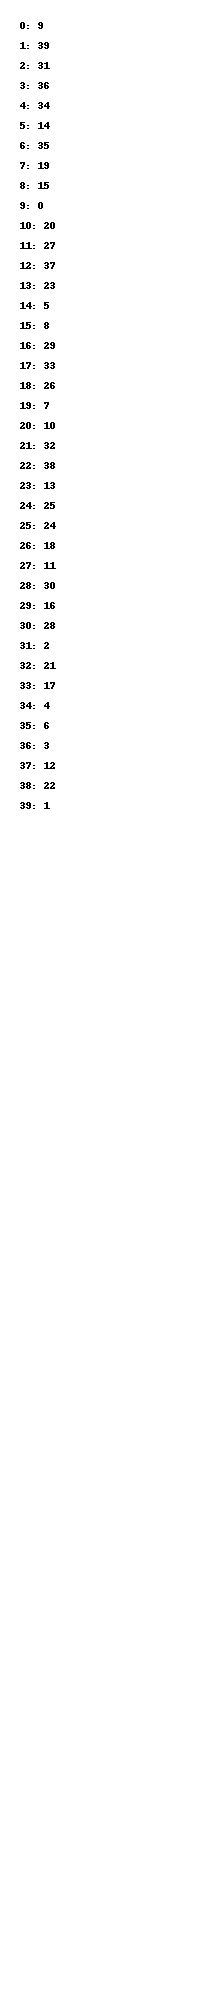


Stable Roommates:
0  ---  9
1  ---  39
2  ---  31
3  ---  36
4  ---  34
5  ---  14
6  ---  35
7  ---  19
8  ---  15
9  ---  0
10  ---  20
11  ---  27
12  ---  37
13  ---  23
14  ---  5
15  ---  8
16  ---  29
17  ---  33
18  ---  26
19  ---  7
20  ---  10
21  ---  32
22  ---  38
23  ---  13
24  ---  25
25  ---  24
26  ---  18
27  ---  11
28  ---  30
29  ---  16
30  ---  28
31  ---  2
32  ---  21
33  ---  17
34  ---  4
35  ---  6
36  ---  3
37  ---  12
38  ---  22
39  ---  1


In [523]:
N=40
tenants=[]

for n in range(N):
    tenants.append(str(n))


preferences_list = []
for n in range(N):
  lista_temp = random.sample(tenants,N)
  lista_temp.remove(str(n))
  lista_temp.insert(0,str(n))
  preferences_list.append(lista_temp)

print(tenants)
print(preferences_list)

persons = {}
for tenant in tenants:
    persons[tenant] = Person(tenant)

for pref in preferences_list:
    tenant = pref[0]
    tenant_prefer = []
    for each in pref[1:]:
        tenant_prefer.append(each)
    persons[tenant].add_preferences(tenant_prefer)


persons = phase_one(persons)
print('\n')

for persn in persons.keys():
    if persons[persn].get_proposal() is not None:
        prefs = persons[persn].get_preferences()
        last_index = prefs.index(persons[persn].get_requester()) + 1
        for rej in prefs[last_index:]:
            persons[persn].remove_preference(rej)
            persons[rej].remove_preference(persn)
    else:
        print('No stable matching possible in this case!')
        break

phase_two(persons)